In [ ]:
import pySim_lib as pysim
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

plt.rcParams.update({"text.usetex": True})

n = 25 #check file numeration
b = 400
h = 0.67
box = b * h
set = "L400-N128"
# --------------------------------------------------------------------------------------------------------------------

colors = ["black", "MediumOrchid", "#BF00FF"]
#load particles
all_nbody_positions = []
all_lpt_positions = []
all_emu_positions = []
all_nbody_velocities = []
all_lpt_velocities = []
all_emu_velocities = []
for i in range(0,n):
    lpt_filename = f"{set}_set1_2lpt_run{i:04}"
    nbody_filename = f"{set}_set1_nbody_run{i:04}"
    emu_filename = f"{set}_set1_emu_run{i:04}"
    # Load the simulation data
    nbody_particles=np.loadtxt(f'/u/chahermann/Sparkling/input/nbody_input/{nbody_filename}.dat')
    # lpt_particles=np.loadtxt(f'/u/chahermann/Sparkling/input/2lpt_input/{lpt_filename}.dat')
    emu_particles=np.loadtxt(f'/u/chahermann/Sparkling/input/emu_input/{emu_filename}.dat')
    # Extract the positions of the particles
    nbody_positions = nbody_particles[:, 0:3]
    # lpt_positions = lpt_particles[:, 0:3]
    emu_positions = emu_particles[:, 0:3]
    # Extract the velocities of the particles
    nbody_velocities = nbody_particles[:, 3:6]
    # lpt_velocities = lpt_particles[:, 3:6]
    emu_velocities = emu_particles[:, 3:6]
    #collect all the positions and velocities
    all_nbody_positions.append(nbody_positions)
    # all_lpt_positions.append(lpt_positions)
    all_emu_positions.append(emu_positions)
    all_nbody_velocities.append(nbody_velocities)
    # all_lpt_velocities.append(lpt_velocities)
    all_emu_velocities.append(emu_velocities)
all_nbody_positions = np.array(all_nbody_positions)
all_lpt_positions = np.array(all_lpt_positions)
all_emu_positions = np.array(all_emu_positions)
all_nbody_velocities = np.array(all_nbody_velocities)
all_lpt_velocities = np.array(all_lpt_velocities)
all_emu_velocities = np.array(all_emu_velocities)

#fine, but not too effective, maybe more loops? NO, I should save the data in a better format

In [ ]:
N_particles = len(nbody_particles) #all lengths should be the same
print("N_particles = ", N_particles)
V_box = box**3
n_m = N_particles / V_box
print("n_mean =", n_m)
r_min = (V_box / N_particles)**(1/3) * 2.5
print("r_min = ", r_min) #also same for each simulation

all_nbody_voids_incl_small = []
all_lpt_voids_incl_small = []
all_emu_voids_incl_small = []
all_nbody_voids = []
all_lpt_voids = []
all_emu_voids = []

#load voids
for i in range(0,n):
    lpt_filename = f"{set}_set1_2lpt_run{i:04}"
    nbody_filename = f"{set}_set1_nbody_run{i:04}"
    emu_filename = f"{set}_set1_emu_run{i:04}"
    nbody_void_data_incl_small = np.loadtxt(f'/u/chahermann/Sparkling/output/nbody_output/void_{nbody_filename}.dat')
    # nbody_void_data_incl_small = np.loadtxt(f'/u/chahermann/Revolver/output/nbody_output/{nbody_filename}/zobov-Revolver_Voids_cat.txt')
    # lpt_void_data_incl_small = np.loadtxt(f'/u/chahermann/Sparkling/output/2lpt_output/void_{lpt_filename}.dat')
    #lpt_void_data_incl_small = np.loadtxt(f'/u/chahermann/Revolver/output/2lpt_output/{lpt_filename}/zobov-Revolver_Voids_cat.txt')
    emu_void_data_incl_small = np.loadtxt(f'/u/chahermann/Sparkling/output/emu_output/void_{emu_filename}.dat')
    #emu_void_data_incl_small = np.loadtxt(f'/u/chahermann/Revolver/output/emu_output/{emu_filename}/zobov-Revolver_Voids_cat.txt')

    all_nbody_voids_incl_small.append(nbody_void_data_incl_small)
    # all_lpt_voids_incl_small.append(lpt_void_data_incl_small)
    all_emu_voids_incl_small.append(emu_void_data_incl_small)

    #filter nbody voids
    nbody_radii_incl_small = nbody_void_data_incl_small[:, 0] 
    #nbody_radii_incl_small = nbody_void_data_incl_small[:, 4] 
    nbody_coords_incl_small = nbody_void_data_incl_small[:, 1:4]
    nbody_allowed = nbody_radii_incl_small > r_min  
    nbody_radii = nbody_radii_incl_small[nbody_allowed]
    nbody_coords = nbody_coords_incl_small[nbody_allowed]
    nbody_void_data = np.column_stack((nbody_radii, nbody_coords))
    all_nbody_voids.append(nbody_void_data)


    #filter 2lpt voids
    # lpt_radii_incl_small = lpt_void_data_incl_small[:, 0]
    #lpt_radii_incl_small = lpt_void_data_incl_small[:, 4]
    # lpt_coords_incl_small = lpt_void_data_incl_small[:, 1:4]
    # lpt_allowed = lpt_radii_incl_small > r_min
    # lpt_radii = lpt_radii_incl_small[lpt_allowed]
    # lpt_coords = lpt_coords_incl_small[lpt_allowed]
    # lpt_void_data = np.column_stack((lpt_radii, lpt_coords))
    # all_lpt_voids.append(lpt_void_data)

    #filter emu voids
    emu_radii_incl_small = emu_void_data_incl_small[:, 0]
    #emu_radii_incl_small = emu_void_data_incl_small[:, 4]
    emu_coords_incl_small = emu_void_data_incl_small[:, 1:4]
    emu_allowed = emu_radii_incl_small > r_min
    emu_radii = emu_radii_incl_small[emu_allowed]
    emu_coords = emu_coords_incl_small[emu_allowed]
    emu_void_data = np.column_stack((emu_radii, emu_coords))
    all_emu_voids.append(emu_void_data)
#convert to numpy arrays
all_nbody_voids_incl_small = np.array(all_nbody_voids_incl_small, dtype=object)
all_lpt_voids_incl_small = np.array(all_lpt_voids_incl_small, dtype=object)
all_emu_voids_incl_small = np.array(all_emu_voids_incl_small, dtype=object)
all_nbody_voids = np.array(all_nbody_voids, dtype=object)
all_lpt_voids = np.array(all_lpt_voids, dtype=object)
all_emu_voids = np.array(all_emu_voids, dtype=object)

def max_radius(void_sets):
    return [np.max(sim[:, 0]) for sim in void_sets if len(sim) > 0]
    #return [np.max(sim[:, 4]) for sim in void_sets if len(sim) > 0]

def min_radius(void_sets):
    return [np.min(sim[:, 0]) for sim in void_sets if len(sim) > 0]
    #return [np.min(sim[:, 4]) for sim in void_sets if len(sim) > 0]



r_max = np.max([np.max(max_radius(all_nbody_voids_incl_small)), np.max(max_radius(all_emu_voids_incl_small))])
print("R_max over all simulations: ", r_max/h, "Mpc")
r_min_global = np.min([np.min(min_radius(all_nbody_voids_incl_small)), np.min(min_radius(all_emu_voids_incl_small))])
print("R_min over all simulations: ", r_min_global/h, "Mpc")


N_particles =  2097152
n_mean = 0.10894957158959047
r_min =  5.234375
R_max over all simulations:  30.350746268656717 Mpc
R_min over all simulations:  2.1283582089552238 Mpc


(3.0, 20.335)

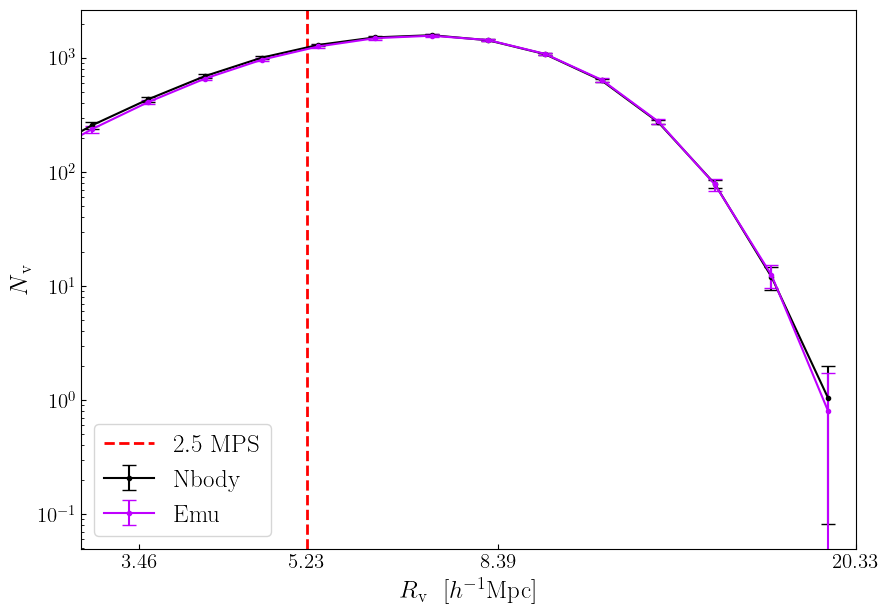

In [ ]:
#compare void size function of 2lpt and nbody
#vsf for each realization
#sigma(realizations)/squrt(N)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
bins = np.logspace(np.log10(r_min_global), np.log10(r_max), 20)

hist_list_nbody = []
hist_list_emu = []

for i in range(0, n):
    nbody_filename = f"{set}_set1_nbody_run{i:04}"
    emu_filename = f"{set}_set1_emu_run{i:04}"
    nbody_void_data_incl_small = np.loadtxt(f'/u/chahermann/Sparkling/output/nbody_output/void_{nbody_filename}.dat')
    #nbody_void_data_incl_small =np.loadtxt(f'/u/chahermann/Revolver/output/nbody_output/{nbody_filename}/zobov-Revolver_Voids_cat.txt')
    emu_void_data_incl_small = np.loadtxt(f'/u/chahermann/Sparkling/output/emu_output/void_{emu_filename}.dat')
    #emu_void_data_incl_small = np.loadtxt(f'/u/chahermann/Revolver/output/emu_output/{emu_filename}/zobov-Revolver_Voids_cat.txt')

    nbody_radii_incl_small = nbody_void_data_incl_small[:, 0]
    emu_radii_incl_small = emu_void_data_incl_small[:, 0]
    #nbody_radii_incl_small = nbody_void_data_incl_small[:, 4]
    #emu_radii_incl_small = emu_void_data_incl_small[:, 4]

    hist_counts_nbody, bin_edges = np.histogram(nbody_radii_incl_small, bins=bins)
    hist_counts_emu, bin_edges = np.histogram(emu_radii_incl_small, bins=bins)
    hist_list_nbody.append(hist_counts_nbody)
    hist_list_emu.append(hist_counts_emu)

hist_array_nbody = np.array(hist_list_nbody)
hist_array_emu = np.array(hist_list_emu)

hist_mean_nbody = np.mean(hist_array_nbody, axis=0)
hist_mean_emu = np.mean(hist_array_emu, axis=0)


hist_error_nbody =  np.sqrt(hist_mean_nbody)#np.std(hist_array_nbody, axis=0) #/ np.sqrt(n-1)
hist_error_emu =  np.sqrt(hist_mean_emu)#np.std(hist_array_emu, axis=0) #/ np.sqrt(n-1)

bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
ax.errorbar(bin_centers, hist_mean_nbody, yerr=hist_error_nbody, fmt='o', color=colors[0], linestyle='-', capsize=5, markersize=3, label='$\mathrm{Nbody}$')
ax.errorbar(bin_centers, hist_mean_emu, yerr=hist_error_emu, fmt='o', color='#BF00FF', linestyle='-', capsize=5, markersize=3, label='$\mathrm{Emu}$')

resi= (hist_mean_emu - hist_mean_nbody)/np.sqrt(hist_error_emu**2 + hist_error_nbody**2)


#histo 2lpt
#hist_lpt, bin_edges_lpt= np.histogram(radii_lpt, bins=bins)
#bin_centers = np.sqrt(bin_edges_lpt[:-1] * bin_edges_lpt[1:])
#errors_lpt = np.sqrt(hist_lpt/(n-1))
#ax.errorbar(bin_centers, hist_lpt/(n-1), yerr=errors_lpt, fmt='o', color=colors[1], linestyle='-', capsize=5, markersize=3, label='$2LPT$')
#histo emu
ax.set_xscale('log')
ax.set_yscale('log')

ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)

ticks = np.logspace(np.log10(r_min_global), np.log10(r_max), 4)
ticks = np.append(ticks, r_min)  
ax.set_xticks(ticks)
ax.set_xticks([], minor=True)  # delete Minor-Ticks, falls nötig
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"$\mathrm{x:.2f}$".rstrip('0').rstrip('.')))  

ax.axvline(x=r_min, color='red', linestyle='--', linewidth=2, label='$\mathrm{2.5} \ \mathrm{MPS}$')
plt.legend(fontsize = 18)

plt.xlabel('$R\mathrm{_v}$  \ $[h^{-1}  \mathrm{Mpc}]$', fontsize = 18)
plt.ylabel('$N\mathrm{_v}$', fontsize = 18)
ax.set_xlim(3, r_max)

#plt.title('$ \mathrm{Comparison \ Of \ The \ Void \ Size \ Functions} $', fontsize = 20)

In [ ]:
#compare integrated density profiles
import itertools


# def weighted_mean_radius_in_interval(r1, r2, dataset):
#     radii = [sim[:, 0] for sim in dataset]  
#     filtered_radii = [r[(r >= r1) & (r <= r2)] for r in radii]
    
#     weighted_means = [] #weighted with histogram
#     for r in filtered_radii:
#         if len(r) > 0:
#             counts, bin_edges = np.histogram(r, bins=np.linspace(r1, r2, 31))
#             bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
            
#             weighted_mean = np.average(bin_centers, weights=counts)
#             weighted_means.append(weighted_mean)
    
#     if len(weighted_means) > 0:
#         return np.mean(weighted_means) 
#     else:
#         return np.nan 

# def weighted_mean_radius_difference(r1, r2, datasets):
#     means = []
#     for sims in datasets:
#         mean = weighted_mean_radius_in_interval(r1, r2, sims)
#         if not np.isnan(mean):
#             means.append(mean)
#     if len(means) == len(datasets):  
#         return np.std(means)  
#     else:
#         return np.inf  

# step = 0.2 #to check intervalls
# best_std = np.inf
# best_bounds = (r_min, r_max)

# for r_1, r_2 in itertools.combinations(np.arange(r_min, r_max, step), 2):
#     if r_2 >= 18 or (r_2 - r_1) < 11:
#         continue
#     std = weighted_mean_radius_difference(r_1, r_2, [all_nbody_voids, 
#                                                      #all_lpt_voids, 
#                                                      all_emu_voids])

#     if std < best_std:
#         best_std = std
#         best_bounds = (r_1, r_2)

# print("STD:", best_std)
# limits = [round(float(i), 3) for i in best_bounds]
# print("Limits:", limits)

all_radii = np.concatenate([data[:, 0] for data in all_nbody_voids])
group_limits = np.percentile(all_radii, [100/3, 200/3, 100])
r_min_list = [r_min]
group_limits = np.concatenate(([r_min], group_limits))
r1 = group_limits[0]
r2 = group_limits[1]
r3 = group_limits[2]
r4 = group_limits[3]

# all_radii = [i for i in all_radii if i > 12.5*h]
# group_limits = np.percentile(all_radii, [100/3, 200/3, 100])
# r_min_list = [r_min]
# group_limits = np.concatenate(([12.5*h], group_limits))
# r1 = group_limits[0]
# r2 = group_limits[1]
# r3 = group_limits[2]
# r4 = group_limits[3]

print("Group limits:", group_limits)

#print(r1, r2, r3, r4)

Group limits: [ 8.375  9.186 10.375 20.335]


[ 2.28252963  2.62518447  3.01927888  3.472535    3.99383423  4.59339124
  5.28295414  6.07603467  6.98817297  8.03724206  9.2437981  10.63148312
 12.22748832 14.06308686 16.17424666 18.60233515 21.39492987 24.60675074
 28.30073226]


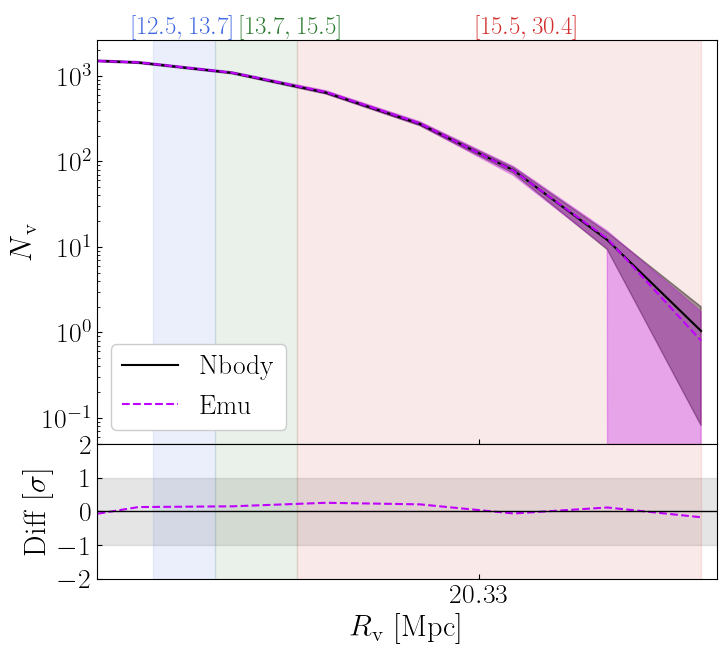

In [ ]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines
print(bin_centers/h)
# Figur und Achsen
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 7), dpi=100, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# ---------------------- Plot 1 --------------------------
ax[0].errorbar(bin_centers/h, hist_mean_nbody ,color=colors[0], linestyle='-', capsize=5, markersize=3, label='$\mathrm{Nbody}$', zorder=2) 
ax[0].fill_between(bin_centers/h, hist_mean_nbody - hist_error_nbody, hist_mean_nbody + hist_error_nbody, color=colors[0], alpha=0.4)

ax[0].errorbar(bin_centers/h, hist_mean_emu, color='#BF00FF', linestyle='--', capsize=5, markersize=3, label='$\mathrm{Emu}$', zorder=3)
ax[0].fill_between(bin_centers/h, hist_mean_emu - hist_error_emu, hist_mean_emu + hist_error_emu, color='#BF00FF', alpha=0.3)

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].get_yaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax[0].get_xaxis().set_tick_params(which='both', direction='in', labelsize=20)
ticks = np.logspace(np.log10(r_min_global), np.log10(r_max), 4)
ticks = np.append(ticks, r_min)  
ax[0].set_xticks(ticks)
ax[0].set_xticks([], minor=True)  # delete Minor-Ticks, falls nötig
ax[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"$\mathrm{x:.2f}$".rstrip('0').rstrip('.')))  
ax[0].set_ylabel('$N\mathrm{_v}$', fontsize = 22)


# ----------------------- Plot 2 -------------------------
ax[1].errorbar(bin_centers/h, resi, color='#BF00FF', linestyle='--', capsize=5, markersize=3, label='$Emulator/Nbody$')
ax[1].set_ylim(-2, 2)
ax[1].set_yticks([-2,-1,0,1])

ax[1].axhspan(-1, 1, color='grey', alpha=0.2)

#ax[1].axvline(x=r_min/h, color='black', linestyle=':', linewidth=1, label='$\mathrm{2.5} \ \mathrm{MPS}$')
ax[1].set_xscale('log')
ax[1].get_yaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax[1].get_xaxis().set_tick_params(which='both', direction='in', labelsize=20)
ax[1].axhline(y=0, color='black', ls='-', zorder=5, lw=1, label = '$\mathrm{Nbody}$')
ticks = np.logspace(np.log10(r_min_global), np.log10(r_max), 5)
ax[1].set_xticks(ticks)
ax[1].set_xticks([], minor=True)
ax[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"$\mathrm{x:.2f}$".rstrip('0').rstrip('.')))

# --------------------------Layout-------------------------------
# plt.xlim(11.5, 29)
plt.xlabel('$R\mathrm{_v}$ $[\mathrm{Mpc}]$', fontsize = 22)
ax[1].set_ylabel('$\mathrm{Diff \ [\sigma]}$', fontsize = 22)
handle_nbody = mlines.Line2D([], [], color='black', linestyle='-', label='$\mathrm{Nbody}$')
handle_emu   = mlines.Line2D([], [], color='#BF00FF', linestyle='--', label='$\mathrm{Emu}$')
combined_handles = [handle_nbody, handle_emu]
ax[0].legend(handles=combined_handles, fontsize=20, loc='lower left', framealpha=1)
ax[0].axvspan(r1/h, r2/h, color='royalblue', alpha=0.1, label='$ 5 \% \ error $',zorder=1)
ax[0].axvspan(r2/h, r3/h, color='#2E7D32', alpha=0.1, label='$ 10 \% \ error $',zorder=1)
ax[0].axvspan(r3/h, bin_centers[18]/h, color='#D32F2F', alpha=0.1, label='$ 10 \% \ error $',zorder=1)
ax[1].axvspan(r1/h, r2/h, color='royalblue', alpha=0.1, label='$ 5 \% \ error $',zorder=1)
ax[1].axvspan(r2/h, r3/h, color='#2E7D32', alpha=0.1, label='$ 10 \% \ error $',zorder=1)
ax[1].axvspan(r3/h, bin_centers[18]/h, color='#D32F2F', alpha=0.1, label='$ 10 \% \ error $',zorder=1)


mid1 = (r1 + r2) / (2 * h)
mid2 = (r2 + r3) / (2 * h)
mid3 = (r3 + bin_centers[18]) / (2 * h)
ax[0].text(0.5, 1.05, 'bla', color="white", transform=ax[0].transAxes)  # nur Platz reservieren

ax[0].text(mid1-0.3, 1.0, fr'$\mathrm{{[{r1/h:.1f}, {r2/h:.1f}]}}$', ha='center', va='bottom', fontsize=18,
           color='royalblue', transform=ax[0].get_xaxis_transform(), zorder=5)
ax[0].text(mid2+0.8, 1.0, fr'$\mathrm{{[{r2/h:.1f}, {r3/h:.1f}]}}$', ha='center', va='bottom', fontsize=18,
           color='#2E7D32', transform=ax[0].get_xaxis_transform(), zorder=5)
ax[0].text(mid3-3, 1.0,fr'$\mathrm{{[{r3/h:.1f}, {r4/h:.1f}]}}$', ha='center', va='bottom', fontsize=18,
           color='#D32F2F', transform=ax[0].get_xaxis_transform(), zorder=5)

fig.subplots_adjust(hspace=0.0)
 # Keine horizontale Lücke zwischen den Plots
fig.savefig(f"/u/chahermann/Sparkling/Results/VSF+Ratio_nbody_emu_{set}_poisson.pdf")

/Users/CHermann/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/CHermann/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


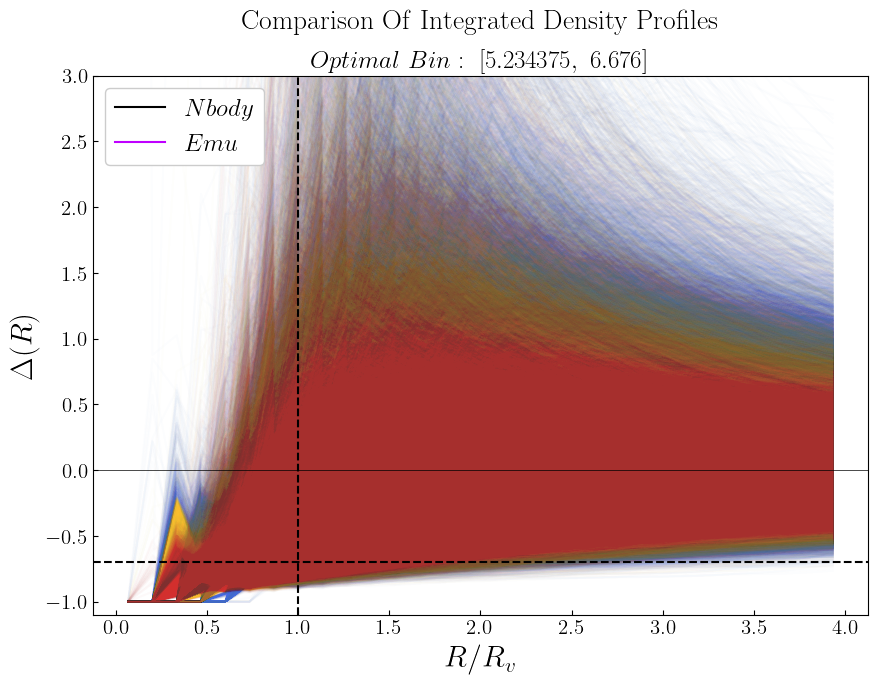

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 3)
#print('Bin between small and big voids with:', r3)

nbody_profiles_list_big = []
nbody_profiles_list_small = []
nbody_profiles_list_mid = []

lpt_profiles_list = []
emu_profiles_list_big = []
emu_profiles_list_small = []
emu_profiles_list_mid = []


scaled_bins = np.linspace(0, 4, 31)  # 30 bins
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

nbody_delta_profiles_groups, nbody_void_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/all_integrated_delta_profiles_population_spaced_groups_{set}.npy", allow_pickle=True)
#nbody_delta_profiles_groups, nbody_void_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/rev_all_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
# lpt_delta_profiles_groups, lpt_void_radii_groups = np.load(f"/u/chahermann/2LPT_results/Numpy_files/all_integrated_delta_profiles_population_spaced_groups_{set}.npy", allow_pickle=True)
#lpt_delta_profiles_groups, lpt_void_radii_groups = np.load(f"/u/chahermann/2LPT_results/Numpy_files/rev_all_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
emu_delta_profiles_groups, emu_void_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/all_integrated_delta_profiles_population_spaced_groups_{set}.npy", allow_pickle=True)
#emu_delta_profiles_groups, emu_void_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/rev_all_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)

def get_size_bin(r):
    if r1 < r < r2:
        return 'small'
    elif r2 < r < r3:
        return 'mid'
    elif r3 < r < r4:
        return 'big'
    else:
        return None

size_settings = {'nbody': {'small': (nbody_profiles_list_small, 'royalblue'),'mid': (nbody_profiles_list_mid, '#FBC02D'), 'big': (nbody_profiles_list_big, '#D32F2F')
    },'emu': {'small': (emu_profiles_list_small, 'royalblue'), 'mid':   (emu_profiles_list_mid, '#FBC02D'), 'big':   (emu_profiles_list_big,'#D32F2F')   }}


# Schleife über Datasets
for label, (radii_groups, delta_groups) in {
    'nbody': (nbody_void_radii_groups, nbody_delta_profiles_groups),
    'emu':   (emu_void_radii_groups,   emu_delta_profiles_groups)
}.items():
    for group in delta_groups:
        for r, delta in zip(radii_groups[group], delta_groups[group]):
            bin_size = get_size_bin(r)
            if bin_size:
                target_list, color = size_settings[label][bin_size]
                delta = np.squeeze(delta)
                target_list.append(delta)
                ax.plot(scaled_bin_centers, delta, marker='None', alpha=0.01, linestyle='-', color=color)
            
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.7, color='k', ls='--')
ax.text(0.5, 1.1, '$ \mathrm{Comparison \ Of \ Integrated \ Density \ Profiles}$', ha='center', va='center', fontsize=20, transform=ax.transAxes)
ax.set_title(f'$Optimal \ Bin: \ [{r1}, \ {r2}]$', fontsize=18)

plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

legend_handles = [ax.plot([], [], color=colors[0], linestyle='-', label='$Nbody$', alpha=1)[0], 
                  #ax.plot([], [], color=colors[1], linestyle='-', label='$2LPT$', alpha=1)[0],
                  ax.plot([], [], color=colors[2], linestyle='-', label='$Emu$', alpha=1)[0]]
ax.legend(handles=legend_handles, fontsize=18, framealpha=1)

fig.savefig(f"/u/chahermann/Sparkling/Results/Stacked_IDP_{set}.pdf")

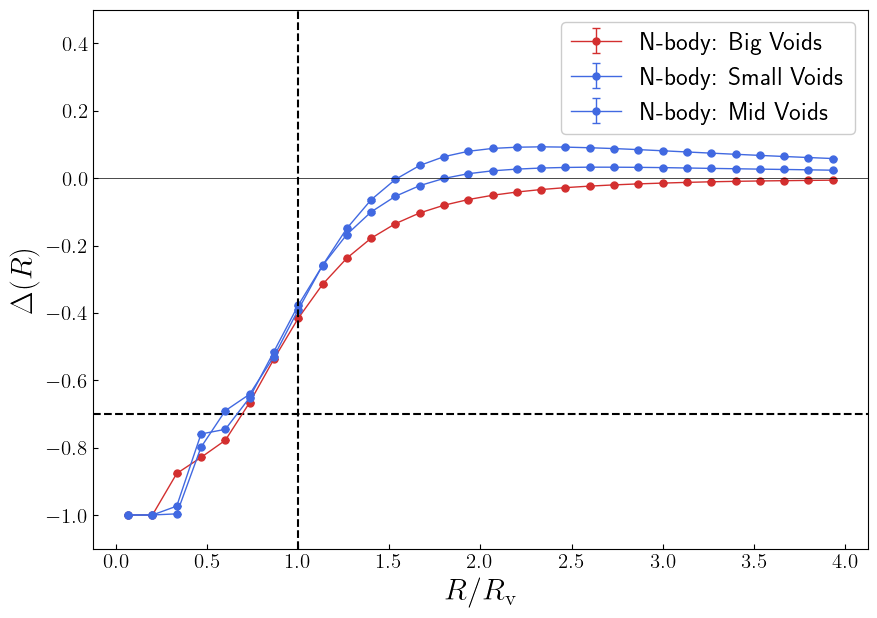

In [34]:
#means
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
plt.ylim(-1.1, 0.5)

nbody_mean_profile_big = np.mean(nbody_profiles_list_big, axis=0)
nbody_mean_profile_small = np.mean(nbody_profiles_list_small, axis=0)
nbody_mean_profile_mid = np.mean(nbody_profiles_list_mid, axis=0)

#lpt_mean_profile = np.mean(lpt_profiles_list, axis=0)
emu_mean_profile_big = np.mean(emu_profiles_list_big, axis=0)
emu_mean_profile_small = np.mean(emu_profiles_list_small, axis=0)
emu_mean_profile_mid = np.mean(emu_profiles_list_mid, axis=0)

nbody_std_delta_profile_big = np.std(nbody_profiles_list_big, axis=0) / np.sqrt(len(nbody_profiles_list_big))
nbody_std_delta_profile_small = np.std(nbody_profiles_list_small, axis=0) / np.sqrt(len(nbody_profiles_list_small))
nbody_std_delta_profile_mid = np.std(nbody_profiles_list_mid, axis=0) / np.sqrt(len(nbody_profiles_list_mid))

#lpt_std_delta_profile = np.std(lpt_profiles_list, axis=0) / np.sqrt(len(lpt_profiles_list))
emu_std_delta_profile_big = np.std(emu_profiles_list_big, axis=0) / np.sqrt(len(emu_profiles_list_big))
emu_std_delta_profile_small = np.std(emu_profiles_list_small, axis=0) / np.sqrt(len(emu_profiles_list_small))
emu_std_delta_profile_mid = np.std(emu_profiles_list_mid, axis=0) / np.sqrt(len(emu_profiles_list_mid))

ax.errorbar(scaled_bin_centers, nbody_mean_profile_big, yerr=nbody_std_delta_profile_big, fmt = 'o', linestyle='-', color='#D32F2F', linewidth=1, capsize= 3, markersize =5, label="N-body: Big Voids")
ax.errorbar(scaled_bin_centers, nbody_mean_profile_small, yerr=nbody_std_delta_profile_small, fmt = 'o', linestyle='-', color='royalblue', linewidth=1, capsize= 3, markersize =5, label="N-body: Small Voids")
ax.errorbar(scaled_bin_centers, nbody_mean_profile_mid, yerr=nbody_std_delta_profile_mid, fmt = 'o', linestyle='-', color='royalblue', linewidth=1, capsize= 3, markersize =5, label="N-body: Mid Voids")

#ax.errorbar(scaled_bin_centers, lpt_mean_profile, yerr=lpt_std_delta_profile, fmt = 'o', linestyle='-', color=colors[1], linewidth=2, capsize= 3, markersize =3, label="2LPT Mean")


ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.7, color='k', ls='--')

#plt.title('$ \mathrm{Comparison \ Of \ The \ Integrated \ Density \ Profiles} $', fontsize=22, pad=20)
plt.xlabel('$R/R\mathrm{_v}$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

# Legende aktualisieren
ax.legend(fontsize=18, framealpha=1)

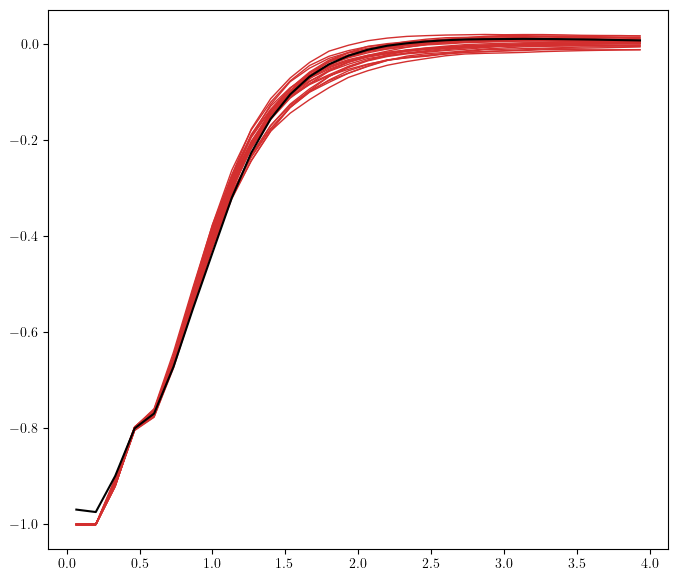

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7), dpi=100, sharex=True
                
                       )
#delta ratoo
all_emu_small_means = []
all_nbody_small_means = []
all_emu_mid_means = []
all_nbody_mid_means = []
all_emu_big_means = []
all_nbody_big_means = []
all_diff_resi_small = []
all_diff_resi_mid = []
all_diff_resi_big = []

for i in range(0,n):
    emu_filename=f"{set}_set1_emu_run{i:04}"
    nbody_filename=f"{set}_set1_nbody_run{i:04}"
    emu_delta_groups, emu_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/{emu_filename}_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
    nbody_delta_groups, nbody_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/{nbody_filename}_integrated_delta_profiles_population_spaced_groups_{set}.npy", allow_pickle=True)
    #emu_delta_groups, emu_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/rev_{emu_filename}_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
    #nbody_delta_groups, nbody_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/rev_{nbody_filename}_integrated_delta_profiles_population_spaced_groups.npy", allow_pickle=True)
    file_emu_small = []
    file_nbody_small = []
    file_emu_mid = []
    file_nbody_mid = []
    file_emu_big = []
    file_nbody_big = []

    for group in emu_delta_groups:
        for r, delta in zip(emu_radii_groups[group], emu_delta_groups[group]):
            bin_size = get_size_bin(r)  # Funktion zum Ermitteln der Bin-Größe

            if bin_size == 'small':
                file_emu_small.append(delta)
            
            elif bin_size == 'mid':
                file_emu_mid.append(delta)

            elif bin_size == 'big':
                file_emu_big.append(delta)
    for group in nbody_delta_groups:
        for r, delta in zip(nbody_radii_groups[group], nbody_delta_groups[group]):
            bin_size = get_size_bin(r)  # Funktion zum Ermitteln der Bin-Größe

            if bin_size == 'small':
                file_nbody_small.append(delta)
            
            elif bin_size == 'mid':
                file_nbody_mid.append(delta)

            elif bin_size == 'big':
                file_nbody_big.append(delta)
                
    all_emu_small_means.append(np.mean(file_emu_small, axis=0))
    all_nbody_small_means.append(np.mean(file_nbody_small, axis=0))
    all_emu_mid_means.append(np.mean(file_emu_mid,axis=0))
    all_nbody_mid_means.append(np.mean(file_nbody_mid, axis=0))
    all_emu_big_means.append(np.mean(file_emu_big, axis=0))
    all_nbody_big_means.append(np.mean(file_nbody_big,axis=0))
    all_diff_resi_small.append(np.mean(file_emu_small, axis=0) - np.mean(file_nbody_small, axis=0))
    all_diff_resi_mid.append(np.mean(file_emu_mid, axis=0) - np.mean(file_nbody_mid, axis=0))
    all_diff_resi_big.append(np.mean(file_emu_big, axis=0) - np.mean(file_nbody_big, axis=0))
    plt.plot(scaled_bin_centers, all_nbody_small_means[i], marker='None', alpha=0.3, linestyle='-', color='black')

    #ax.errorbar(scaled_bin_centers, all_emu_small_means[i], linestyle='-', color='#D32F2F', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Large \ Voids}$", zorder=3)
    #ax.errorbar(scaled_bin_centers, all_nbody_small_means[i], linestyle='-', color='#D32F2F', linewidth=1, alpha=0.5, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Large \ Voids}$", zorder=3)


nbody_big_means = np.mean(all_nbody_big_means, axis=0)
nbody_mid_means = np.mean(all_nbody_mid_means, axis=0)
nbody_small_means = np.mean(all_nbody_small_means, axis=0)
emu_big_means = np.mean(all_emu_big_means, axis=0)
emu_mid_means = np.mean(all_emu_mid_means, axis=0)
emu_small_means = np.mean(all_emu_small_means, axis=0)
#ax.errorbar(scaled_bin_centers, nbody_small_means, linestyle='-', color='black', linewidth=1.5, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Large \ Voids}$", zorder=3)
print("Shape of nbody_small_means:", nbody_small_means.shape)
nbody_big_error = np.std(all_nbody_big_means, axis=0)#/np.sqrt(n-1)
emu_big_error = np.std(all_emu_big_means, axis=0)#/np.sqrt(n-1)
nbody_mid_error = np.std(all_nbody_mid_means, axis=0)#/np.sqrt(n-1)
emu_mid_error = np.std(all_emu_mid_means, axis=0)#/np.sqrt(n-1)
nbody_small_error = np.std(all_nbody_small_means, axis=0)#/np.sqrt(n-1)
emu_small_error = np.std(all_emu_small_means, axis=0)#/np.sqrt(n-1)

plt.fill_between(scaled_bin_centers, nbody_small_means + nbody_small_error, nbody_small_means - nbody_small_error, color = 'red')
plt.savefig(f"/u/chahermann/Sparkling/Results/Test_nbody_small.pdf", dpi=300)

resi_diff_small = np.mean(all_diff_resi_small, axis=0)
resi_diff_mid = np.mean(all_diff_resi_mid, axis=0)
resi_diff_big = np.mean(all_diff_resi_big, axis=0)

resi_diff_std_small= np.std(all_diff_resi_small, axis=0)
resi_diff_std_mid= np.std(all_diff_resi_mid, axis=0)
resi_diff_std_big= np.std(all_diff_resi_big, axis=0)

# resi_small_mean= (emu_small_means - nbody_small_means)/np.sqrt(emu_small_error**2 + nbody_small_error**2)
# resi_mid_mean= (emu_mid_means - nbody_mid_means)/np.sqrt(emu_mid_error**2 + nbody_mid_error**2)
# resi_big_mean= (emu_big_means - nbody_big_means)/np.sqrt(emu_big_error**2 + nbody_big_error**2)



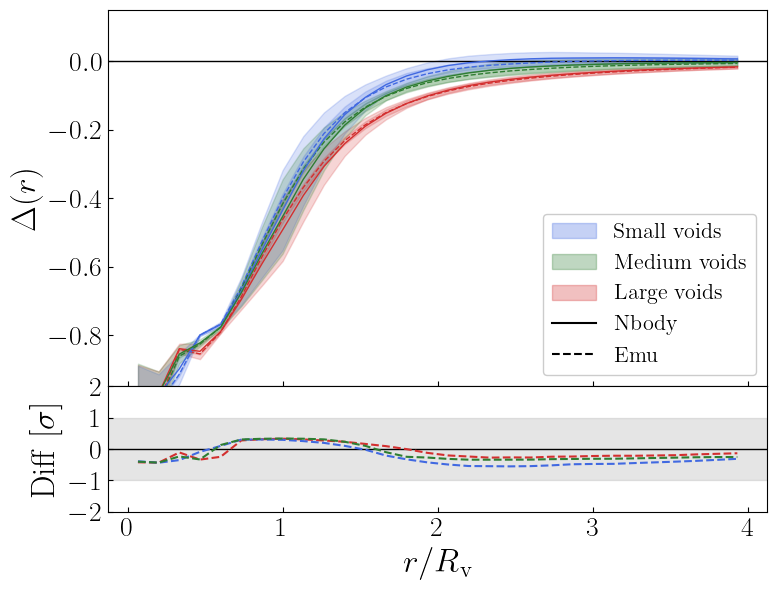

In [ ]:


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), dpi=100, sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]}
                       )
scaled_bins = np.linspace(0, 4, 31)  # 30 bins
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

# ----------- Plot 1 -----------
ax[0].set_ylim(-0.95, 0.35)
ax[0].errorbar(scaled_bin_centers, nbody_big_means, linestyle='-', color='#D32F2F', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Large \ Voids}$", zorder=3)
ax[0].fill_between(scaled_bin_centers, nbody_big_means - nbody_big_error, nbody_big_means + nbody_big_error, color='#D32F2F', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, nbody_small_means, linestyle='-', color='royalblue', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Small \ Voids}$", zorder=3)
ax[0].fill_between(scaled_bin_centers, nbody_small_means - nbody_small_error, nbody_small_means + nbody_small_error, color='royalblue', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, nbody_mid_means, linestyle='-', color='#2E7D32', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Medium \ Voids}$", zorder=3)
ax[0].fill_between(scaled_bin_centers, nbody_mid_means - nbody_mid_error, nbody_mid_means + nbody_mid_error, color='#2E7D32', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, emu_big_means, linestyle='--', color='#D32F2F', linewidth=1, capsize=3, markersize=6,label="$\mathrm{Emu:Large \ Voids}$")
ax[0].fill_between(scaled_bin_centers, emu_big_means - emu_big_error, emu_big_means + emu_big_error, color='#D32F2F', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, emu_small_means, linestyle='--', color='royalblue', linewidth=1, capsize=3, markersize=6, label="$\mathrm{Emu:Small \ Voids}$")
ax[0].fill_between(scaled_bin_centers, emu_small_means - emu_small_error, emu_small_means + emu_small_error, color='royalblue', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, emu_mid_means, linestyle='--', color='#2E7D32', linewidth=1, capsize=3, markersize=6, label="$\mathrm{Emu:Medium \ Voids}$")
ax[0].fill_between(scaled_bin_centers, emu_mid_means - emu_mid_error, emu_mid_means + emu_mid_error, color='#2E7D32', alpha=0.2)

ax[0].axhline(y=0, color='k', ls='-', zorder=1, lw=1)
ax[0].axvline(x=1, color='k', ls=':', zorder=1, lw=0.9)
ax[0].axhline(y=-0.7, color='k', ls=':', lw= 0.9)
ax[0].set_ylabel('$\Delta(r)$', fontsize=24)
ax[0].tick_params(axis='both', direction='in', labelsize=20)
ax[0].legend(fontsize=20, framealpha=1)

# ---------- Plot 2 --------


ax[1].errorbar(scaled_bin_centers, resi_diff_big, color='#D32F2F', linestyle='--', markersize=6, zorder=2)
ax[1].errorbar(scaled_bin_centers, resi_diff_small, color='royalblue', linestyle='--', markersize=6, zorder=2)
ax[1].errorbar(scaled_bin_centers, resi_diff_mid, color='#2E7D32', linestyle='--', markersize=6, zorder=2)
ax[1].fill_between(scaled_bin_centers, resi_diff_big - resi_diff_std_big, resi_diff_big + resi_diff_std_big, color='#D32F2F', alpha=0.2)
ax[1].fill_between(scaled_bin_centers, resi_diff_small - resi_diff_std_small, resi_diff_small + resi_diff_std_small, color='royalblue', alpha=0.2)
ax[1].fill_between(scaled_bin_centers, resi_diff_mid - resi_diff_std_mid, resi_diff_mid + resi_diff_std_mid, color='#2E7D32', alpha=0.2)

# ax[1].axhspan(-1, 1, color='grey', alpha=0.2)

# ax[1].axvline(x=1, color='k', ls=':', zorder=1, lw=0.9)
ax[1].axhline(y=0, color='k', ls='-', zorder=1, lw=1)

ax[1].set_xlabel('$r/R\mathrm{_v}$', fontsize=24) 
ax[1].set_ylabel('$\mathrm{Diff}$', fontsize=24)
ax[1].tick_params(axis='both', direction='in', labelsize=20)
ax[1].set_ylim(-0.05,0.03)  

# ----------------------Layout------------------------------

# Farben (Void-Größe)
handle_small = Patch(facecolor='royalblue', edgecolor='royalblue', alpha=0.3, label='$\mathrm{Small \ voids}$')
handle_mid   = Patch(facecolor='#2E7D32', edgecolor='#2E7D32', alpha=0.3, label='$\mathrm{Medium \ voids}$')
handle_big   = Patch(facecolor='#D32F2F', edgecolor='#D32F2F', alpha=0.3, label='$\mathrm{Large \ voids}$')

# Linienstile (Methoden)
handle_nbody = mlines.Line2D([], [], color='black', linestyle='-', label='$\mathrm{Nbody}$')
handle_emu   = mlines.Line2D([], [], color='black', linestyle='--', label='$\mathrm{Emu}$')

combined_handles = [handle_small, handle_mid, handle_big, handle_nbody, handle_emu]
ax[0].legend(handles=combined_handles, fontsize=16, title_fontsize=17, loc='lower right', framealpha=1)
ax[1].set_yticks([-0.04, -0.02, 0, 0.02])

plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
plt.show()
fig.savefig(f"/u/chahermann/Sparkling/Results/IDP+diff_nbody_emu_{set}.pdf")

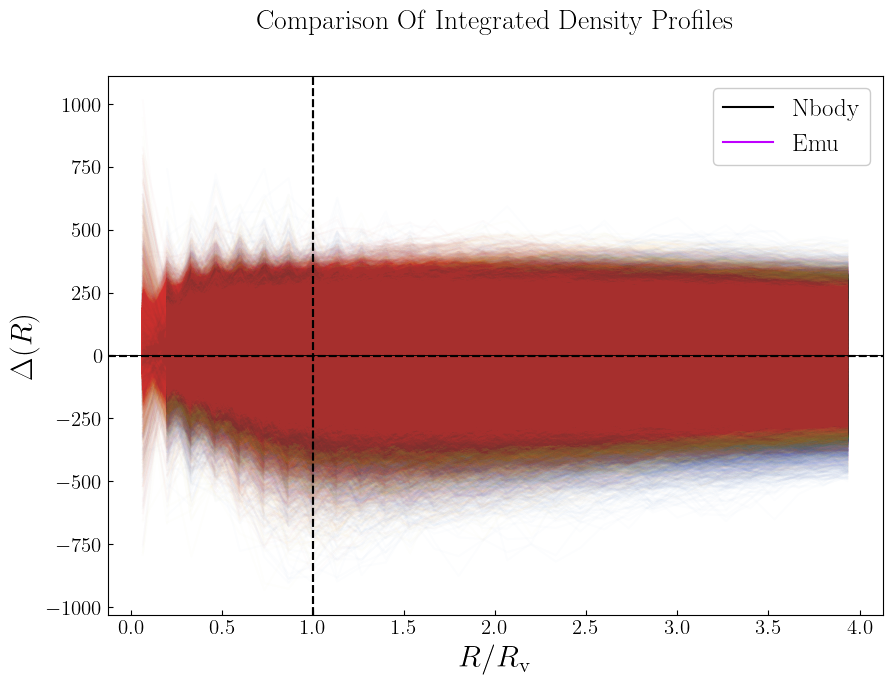

In [ ]:
#compare velocity profiles

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)

nbody_velo_profiles_list_big = []
nbody_velo_profiles_list_small = []
nbody_velo_profiles_list_mid = []

#lpt_velo_profiles_list = []
emu_velo_profiles_list_big = []
emu_velo_profiles_list_small = []
emu_velo_profiles_list_mid = []

scaled_bins = np.linspace(0, 4, 31)  # 30 bins
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

nbody_velocity_profiles_groups, nbody_void_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/all_velocity_profiles_equipopulated_groups_{set}.npy", allow_pickle=True)
#nbody_velocity_profiles_groups, nbody_void_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/rev_all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
#lpt_velocity_profiles_groups, lpt_void_radii_groups = np.load(f"/u/chahermann/2LPT_results/Numpy_files/all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
#lpt_velocity_profiles_groups, lpt_void_radii_groups = np.load(f"/u/chahermann/2LPT_results/Numpy_files/rev_all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
emu_velocity_profiles_groups, emu_void_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/all_velocity_profiles_equipopulated_groups_{set}.npy", allow_pickle=True)
#emu_velocity_profiles_groups, emu_void_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/rev_all_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)


def get_size_bin(r):
    if r1 < r < r2:
        return 'small'
    elif r2 < r < r3:
        return 'mid'
    elif r3 < r < r4:
        return 'big'
    else:
        return None
    
size_settings = {'nbody': {'small': (nbody_velo_profiles_list_small, 'royalblue'),'mid': (nbody_velo_profiles_list_mid, '#FBC02D'), 'big': (nbody_velo_profiles_list_big, '#D32F2F')
    }, 'emu': {'small': (emu_velo_profiles_list_small, 'royalblue'), 'mid':   (emu_velo_profiles_list_mid, '#FBC02D'), 'big':   (emu_velo_profiles_list_big,'#D32F2F') }}

# Schleife über Datasets
for label, (radii_groups, velo_groups) in {'nbody': (nbody_void_radii_groups, nbody_velocity_profiles_groups),'emu':   (emu_void_radii_groups,   emu_velocity_profiles_groups)
}.items():
    for group in velo_groups:
        for r, velo in zip(radii_groups[group], velo_groups[group]):
            bin_size = get_size_bin(r)
            if bin_size:
                target_list, color = size_settings[label][bin_size]
                velo = np.squeeze(velo)
                target_list.append(velo)
                ax.plot(scaled_bin_centers, velo, marker='None', alpha=0.01, linestyle='-', color=color)
            
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')
ax.text(0.5, 1.1, '$ \mathrm{Comparison \ Of \ Integrated \ Density \ Profiles}$', ha='center', va='center', fontsize=20, transform=ax.transAxes)

plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$v$', fontsize=22)

legend_handles = [ax.plot([], [], color=colors[0], linestyle='-', label='$Nbody$', alpha=1)[0], 
                  #ax.plot([], [], color=colors[1], linestyle='-', label='$2LPT$', alpha=1)[0],
                  ax.plot([], [], color=colors[2], linestyle='-', label='$Emu$', alpha=1)[0]]
ax.legend(handles=legend_handles, fontsize=18, framealpha=1)
ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')
#ax.text(0.5, 1.1, '$ \mathrm{Comparison \ Of \ Velocity \ Profiles}$', ha='center', va='center', fontsize=20, transform=ax.transAxes)
#ax.set_title(f'$Optimal \ Bin: \ [{r1}, \ {r2}]$', fontsize=18)

plt.xlabel('$R/R\mathrm{_v}$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

legend_handles = [ax.plot([], [], color=colors[0], linestyle='-', label='$\mathrm{Nbody}$', alpha=1)[0], 
                 # ax.plot([], [], color=colors[1], linestyle='-', label='$2LPT$', alpha=1)[0],
                  ax.plot([], [], color=colors[2], linestyle='-', label='$\mathrm{Emu}$', alpha=1)[0]]
ax.legend(handles=legend_handles, fontsize=18, framealpha=1)

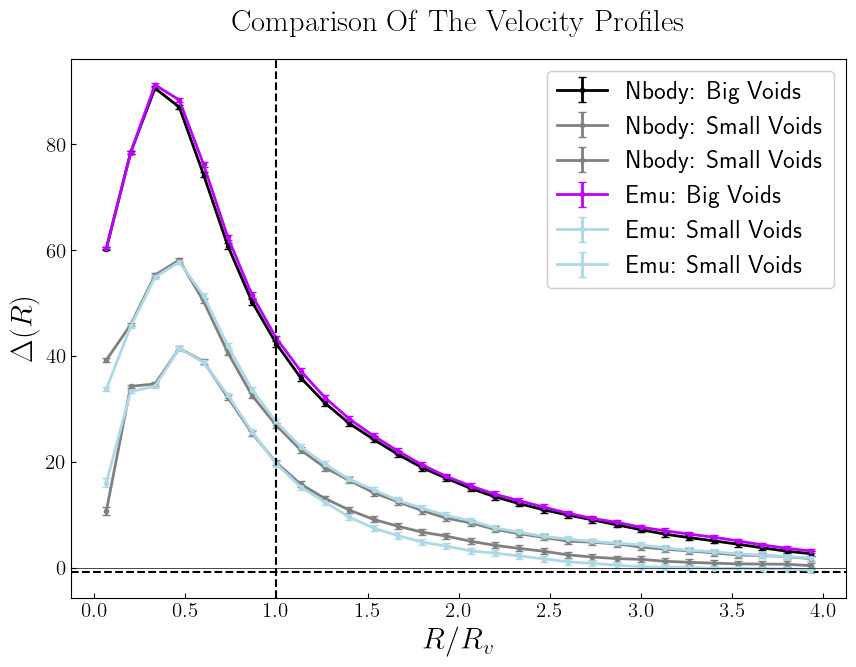

In [ ]:
#means
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7), dpi=100)
nbody_velo_mean_profile_big = np.nanmean(nbody_velo_profiles_list_big, axis=0)
nbody_velo_mean_profile_small = np.nanmean(nbody_velo_profiles_list_small, axis=0)
nbody_velo_mean_profile_mid = np.nanmean(nbody_velo_profiles_list_mid, axis=0)

#lpt_velo_mean_profile = np.nanmean(lpt_velo_profiles_list, axis=0)
emu_velo_mean_profile_big = np.nanmean(emu_velo_profiles_list_big, axis=0)
emu_velo_mean_profile_small = np.nanmean(emu_velo_profiles_list_small, axis=0)
emu_velo_mean_profile_mid = np.nanmean(emu_velo_profiles_list_mid, axis=0)

nbody_std_velo_profile_big = np.nanstd(nbody_velo_profiles_list_big, axis=0) / np.sqrt(len(nbody_velo_profiles_list_big))
nbody_std_velo_profile_small = np.nanstd(nbody_velo_profiles_list_small, axis=0) / np.sqrt(len(nbody_velo_profiles_list_small))
nbody_std_velo_profile_mid = np.nanstd(nbody_velo_profiles_list_mid, axis=0) / np.sqrt(len(nbody_velo_profiles_list_mid))

#lpt_std_velo_profile = np.nanstd(lpt_velo_profiles_list, axis=0) / np.sqrt(len(lpt_velo_profiles_list))
emu_std_velo_profile_big = np.nanstd(emu_velo_profiles_list_big, axis=0) / np.sqrt(len(emu_velo_profiles_list_big))
emu_std_velo_profile_small = np.nanstd(emu_velo_profiles_list_small, axis=0) / np.sqrt(len(emu_velo_profiles_list_small))
emu_std_velo_profile_mid = np.nanstd(emu_velo_profiles_list_mid, axis=0) / np.sqrt(len(emu_velo_profiles_list_mid))

ax.errorbar(scaled_bin_centers, nbody_velo_mean_profile_big, yerr=nbody_std_velo_profile_big, fmt = 'o', linestyle='-', color=colors[0], linewidth=2, capsize= 3, markersize =3, label="Nbody: Big Voids")
ax.errorbar(scaled_bin_centers, nbody_velo_mean_profile_small, yerr=nbody_std_velo_profile_small, fmt = 'o', linestyle='-', color='gray', linewidth=2, capsize= 3, markersize =3, label="Nbody: Small Voids")
ax.errorbar(scaled_bin_centers, nbody_velo_mean_profile_mid, yerr=nbody_std_velo_profile_mid, fmt = 'o', linestyle='-', color='gray', linewidth=2, capsize= 3, markersize =3, label="Nbody: Small Voids")

#ax.errorbar(scaled_bin_centers, lpt_velo_mean_profile, yerr=lpt_std_velo_profile, fmt = 'o', linestyle='-', color=colors[1], linewidth=2, capsize= 3, markersize =3, label="2LPT Mean")

print("Shape emu small:", emu_velo_mean_profile_small.shape)
print("Shape scaled bins:", scaled_bin_centers.shape)

ax.errorbar(scaled_bin_centers, emu_velo_mean_profile_big, yerr=emu_std_velo_profile_big, fmt = 'o', linestyle='-', color=colors[2], linewidth=2, capsize= 3, markersize =3, label="Emu: Big Voids")
ax.errorbar(scaled_bin_centers, emu_velo_mean_profile_small, yerr=emu_std_velo_profile_small, fmt = 'o', linestyle='-', color='lightblue', linewidth=2, capsize= 3, markersize =3, label="Emu: Small Voids")
ax.errorbar(scaled_bin_centers, emu_velo_mean_profile_mid, yerr=emu_std_velo_profile_mid, fmt = 'o', linestyle='-', color='lightblue', linewidth=2, capsize= 3, markersize =3, label="Emu: Small Voids")


ax.get_yaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.get_xaxis().set_tick_params(which='both', direction='in', labelsize=15)
ax.axhline(y=0, color='k', ls='-', zorder=5, lw=0.5)
ax.axvline(x=1, color='k', ls='--', zorder=5)
ax.axhline(y=-0.8, color='k', ls='--')

plt.title('$ \mathrm{Comparison \ Of \ The \ Velocity \ Profiles} $', fontsize=22, pad=20)
plt.xlabel('$R/R_v$', fontsize=22)
plt.ylabel('$\Delta(R)$', fontsize=22)

# Legende aktualisieren

In [ ]:
all_emu_small_velo_means = []
all_nbody_small_velo_means = []
all_emu_mid_velo_means = []
all_nbody_mid_velo_means = []
all_emu_big_velo_means = []
all_nbody_big_velo_means = []
all_diff_resi_velo_small = []
all_diff_resi_velo_mid = []
all_diff_resi_velo_big = []

for i in range(0,n):
    emu_filename=f"{set}_set1_emu_run{i:04}"
    nbody_filename=f"{set}_set1_nbody_run{i:04}"
    emu_velo_groups, emu_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/{emu_filename}_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
    nbody_velo_groups, nbody_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/{nbody_filename}_velocity_profiles_equipopulated_groups_{set}.npy", allow_pickle=True)
    #emu_velo_groups, emu_radii_groups = np.load(f"/u/chahermann/Emu_results/Numpy_files/rev_{emu_filename}_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
    n#body_velo_groups, nbody_radii_groups = np.load(f"/u/chahermann/Nbody_results/Numpy_files/rev_{nbody_filename}_velocity_profiles_equipopulated_groups.npy", allow_pickle=True)
    file_emu_small_velo = []
    file_nbody_small_velo = []
    file_emu_mid_velo = []
    file_nbody_mid_velo = []
    file_emu_big_velo = []
    file_nbody_big_velo = []

    for group in emu_velo_groups:
        for r, velo in zip(emu_radii_groups[group], emu_velo_groups[group]):
            bin_size = get_size_bin(r)  # Funktion zum Ermitteln der Bin-Größe

            if bin_size == 'small':
                file_emu_small_velo.append(velo)
            
            elif bin_size == 'mid':
                file_emu_mid_velo.append(velo)

            elif bin_size == 'big':
                file_emu_big_velo.append(velo)
    for group in nbody_velo_groups:
        for r, velo in zip(nbody_radii_groups[group], nbody_velo_groups[group]):
            bin_size = get_size_bin(r)  # Funktion zum Ermitteln der Bin-Größe

            if bin_size == 'small':
                file_nbody_small_velo.append(velo)
            
            elif bin_size == 'mid':
                file_nbody_mid_velo.append(velo)

            elif bin_size == 'big':
                file_nbody_big_velo.append(velo)
    all_emu_small_velo_means.append(np.nanmean(file_emu_small_velo, axis=0))
    all_nbody_small_velo_means.append(np.nanmean(file_nbody_small_velo, axis=0))
    all_emu_mid_velo_means.append(np.nanmean(file_emu_mid_velo,axis=0))
    all_nbody_mid_velo_means.append(np.nanmean(file_nbody_mid_velo, axis=0))
    all_emu_big_velo_means.append(np.nanmean(file_emu_big_velo, axis=0))
    all_nbody_big_velo_means.append(np.nanmean(file_nbody_big_velo,axis=0))
    all_diff_resi_velo_small.append(np.nanmean(file_emu_small_velo, axis=0) - np.nanmean(file_nbody_small_velo, axis=0))
    all_diff_resi_velo_mid.append(np.nanmean(file_emu_mid_velo, axis=0) - np.nanmean(file_nbody_mid_velo, axis=0))
    all_diff_resi_velo_big.append(np.nanmean(file_emu_big_velo, axis=0) - np.nanmean(file_nbody_big_velo, axis=0))



nbody_big_velo_means = np.nanmean(all_nbody_big_velo_means, axis=0)
nbody_mid_velo_means = np.nanmean(all_nbody_mid_velo_means, axis=0)
nbody_small_velo_means = np.nanmean(all_nbody_small_velo_means, axis=0)
emu_big_velo_means = np.nanmean(all_emu_big_velo_means, axis=0)
emu_mid_velo_means = np.nanmean(all_emu_mid_velo_means, axis=0)
emu_small_velo_means = np.nanmean(all_emu_small_velo_means, axis=0)

nbody_big_velo_error = np.nanstd(all_nbody_big_velo_means, axis=0)#/np.sqrt(n-1)
emu_big_velo_error = np.nanstd(all_emu_big_velo_means, axis=0)#/np.sqrt(n-1)
nbody_mid_velo_error = np.nanstd(all_nbody_mid_velo_means, axis=0)#/np.sqrt(n-1)
emu_mid_velo_error = np.nanstd(all_emu_mid_velo_means, axis=0)#/np.sqrt(n-1)
nbody_small_velo_error = np.nanstd(all_nbody_small_velo_means, axis=0)#/np.sqrt(n-1)
emu_small_velo_error = np.nanstd(all_emu_small_velo_means, axis=0)#/np.sqrt(n-1)

resi_diff_small_velo = np.nanmean(all_diff_resi_velo_small, axis=0)
resi_diff_mid_velo = np.nanmean(all_diff_resi_velo_mid, axis=0)
resi_diff_big_velo = np.nanmean(all_diff_resi_velo_big, axis=0)

resi_diff_std_small_velo= np.nanstd(all_diff_resi_velo_small, axis=0)
resi_diff_std_mid_velo= np.nanstd(all_diff_resi_velo_mid, axis=0)
resi_diff_std_big_velo= np.nanstd(all_diff_resi_velo_big, axis=0)

# resi_small_velo_mean= (emu_small_velo_means - nbody_small_velo_means)/np.sqrt(emu_small_velo_error**2 + nbody_small_velo_error**2)
# resi_mid_velo_mean= (emu_mid_velo_means - nbody_mid_velo_means)/np.sqrt(emu_mid_velo_error**2 + nbody_mid_velo_error**2)
# resi_big_velo_mean= (emu_big_velo_means - nbody_big_velo_means)/np.sqrt(emu_big_velo_error**2 + nbody_big_velo_error**2)

/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_16069/2440024712.py:47: RuntimeWarning: Mean of empty slice
  all_emu_small_velo_means[i]= np.nanmean(file_emu_small_velo, axis=0)
/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_16069/2440024712.py:48: RuntimeWarning: Mean of empty slice
  all_nbody_small_velo_means[i]= np.nanmean(file_nbody_small_velo, axis=0)
/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_16069/2440024712.py:49: RuntimeWarning: Mean of empty slice
  all_emu_mid_velo_means[i]= np.nanmean(file_emu_mid_velo,axis=0)
/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_16069/2440024712.py:50: RuntimeWarning: Mean of empty slice
  all_nbody_mid_velo_means[i]= np.nanmean(file_nbody_mid_velo, axis=0)
/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipykernel_16069/2440024712.py:51: RuntimeWarning: Mean of empty slice
  all_emu_big_velo_means[i]= np.nanmean(file_emu_big_velo, axis=0)
/var/folders/ss/qz81s18561g4v9nxv6k7wq_w0000gn/T/ipyker

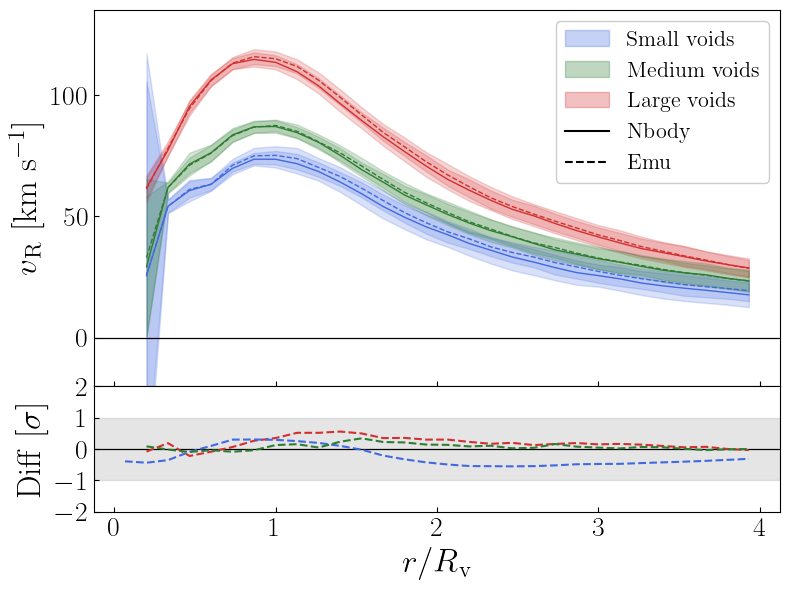

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Patch


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), dpi=100, sharex=True, 
                       gridspec_kw={'height_ratios': [3, 1]}
                       )
scaled_bins = np.linspace(0, 4, 31) 
scaled_bin_centers = (scaled_bins[:-1] + scaled_bins[1:]) / 2

# -------------- Plot 1--------------
ax[0].errorbar(scaled_bin_centers, nbody_big_velo_means, linestyle='-', color='#D32F2F', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Large \ Voids}$", zorder=3)
ax[0].fill_between(scaled_bin_centers, nbody_big_velo_means - nbody_big_velo_error, nbody_big_velo_means + nbody_big_velo_error, color='#D32F2F', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, nbody_small_velo_means, linestyle='-', color='royalblue', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Small \ Voids}$", zorder=3)
ax[0].fill_between(scaled_bin_centers, nbody_small_velo_means - nbody_small_velo_error, nbody_small_velo_means + nbody_small_velo_error, color='royalblue', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, nbody_mid_velo_means, linestyle='-', color='#2E7D32', linewidth=1, capsize=3, markersize=6, markeredgecolor='k', label="$\mathrm{Nbody:Medium \ Voids}$", zorder=3)
ax[0].fill_between(scaled_bin_centers, nbody_mid_velo_means - nbody_mid_velo_error, nbody_mid_velo_means + nbody_mid_velo_error, color='#2E7D32', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, emu_big_velo_means, linestyle='--', color='#D32F2F', linewidth=1, capsize=3, markersize=6,label="$\mathrm{Emu:Large \ Voids}$")
ax[0].fill_between(scaled_bin_centers, emu_big_velo_means - emu_big_velo_error, emu_big_velo_means + emu_big_velo_error, color='#D32F2F', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, emu_small_velo_means, linestyle='--', color='royalblue', linewidth=1, capsize=3, markersize=6, label="$\mathrm{Emu:Small \ Voids}$")
ax[0].fill_between(scaled_bin_centers, emu_small_velo_means - emu_small_velo_error, emu_small_velo_means + emu_small_velo_error, color='royalblue', alpha=0.2)

ax[0].errorbar(scaled_bin_centers, emu_mid_velo_means, linestyle='--', color='#2E7D32', linewidth=1, capsize=3, markersize=6, label="$\mathrm{Emu:Medium \ Voids}$")
ax[0].fill_between(scaled_bin_centers, emu_mid_velo_means - emu_mid_velo_error, emu_mid_velo_means + emu_mid_velo_error, color='#2E7D32', alpha=0.2)

ax[0].set_ylabel('$v\mathrm{_{rad}  \ [km \ s^{-1}]}$', fontsize=24)
ax[0].tick_params(axis='both', direction='in', labelsize=20)
ax[0].legend(fontsize=20, framealpha=1)
ax[0].axhline(y=0, color='black', ls='-', zorder=2, lw=0.9)
ax[0].set_ylim(-30, 90)  

# ---------- Plot 2 ---------

ax[1].errorbar(scaled_bin_centers, resi_diff_big_velo, color='#D32F2F', linestyle='--', markersize=6, zorder=2)
ax[1].errorbar(scaled_bin_centers, resi_diff_small_velo, color='royalblue', linestyle='--', markersize=6, zorder=2)
ax[1].errorbar(scaled_bin_centers, resi_diff_mid_velo, color='#2E7D32', linestyle='--', markersize=6, zorder=2)
ax[1].fill_between(scaled_bin_centers, resi_diff_small_velo - resi_diff_std_small_velo, resi_diff_small_velo + resi_diff_std_small_velo, color='royalblue', alpha=0.2)
ax[1].fill_between(scaled_bin_centers, resi_diff_mid_velo - resi_diff_std_mid_velo, resi_diff_mid_velo + resi_diff_std_mid_velo, color='#2E7D32', alpha=0.2)
ax[1].fill_between(scaled_bin_centers, resi_diff_big_velo - resi_diff_std_big_velo, resi_diff_big_velo + resi_diff_std_big_velo, color='#D32F2F', alpha=0.2)

# ax[1].axhspan(-1, 1, color='grey', alpha=0.2)
ax[1].axhline(y=0, color='black', ls='-', zorder=2, lw=0.9)

ax[1].set_xlabel('$r/R\mathrm{_v}$', fontsize=24) 
ax[1].set_ylabel('$\mathrm{Diff \ [km \ s^{-1}]}$', fontsize=24)
ax[1].tick_params(axis='both', direction='in', labelsize=20)
ax[1].set_ylim(-7, 5)  

# -------------------------------Layout--------------------------------------------

handle_small = Patch(facecolor='royalblue', edgecolor='royalblue', alpha=0.3, label='$\mathrm{Small \ voids}$')
handle_mid   = Patch(facecolor='#2E7D32', edgecolor='#2E7D32', alpha=0.3, label='$\mathrm{Medium \ voids}$')
handle_big   = Patch(facecolor='#D32F2F', edgecolor='#D32F2F', alpha=0.3, label='$\mathrm{Large \ voids}$')


handle_nbody = mlines.Line2D([], [], color='black', linestyle='-', label='$\mathrm{Nbody}$')
handle_emu   = mlines.Line2D([], [], color='black', linestyle='--', label='$\mathrm{Emu}$')

combined_handles = [handle_small, handle_mid, handle_big, handle_nbody, handle_emu]
ax[0].legend(handles=combined_handles, fontsize=16, title_fontsize=17, loc='upper right', framealpha=1)
ax[1].set_yticks([-5,0,5])

plt.tight_layout()
plt.subplots_adjust(hspace=0.0)
fig.savefig(f"/u/chahermann/Sparkling/Results/VP+diff_nbody_emu_{set}.pdf")